In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
col=['X','Y','Class']

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Adityarajora/Complete-KNN-visualization/master/1.ushape.csv',names=col,header=None)
df.head()

,X,Y,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [14]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [15]:
X

array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633,

In [16]:
y

array([0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.])

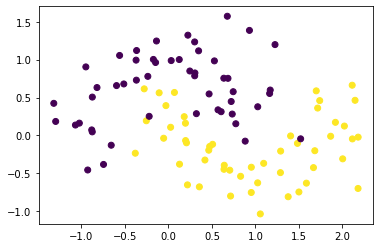

In [24]:
plt.scatter(X[:,0],X[:,1],c=y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [27]:
clf.coef_

array([[ 0.98169246, -2.26183106]])

In [28]:
clf.intercept_

array([0.18647183])

<AxesSubplot:>

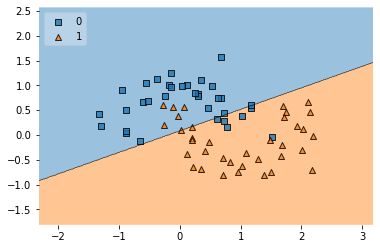

In [30]:
#plt.figure(figsize=(10,10))
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.astype('int'), clf, legend=2)

In [31]:
y_pred = clf.predict(X_test)
y_pred

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8666666666666667

In [46]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8300000000000001

## Apply Polynomial Feature

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [36]:
X_trf.shape

(100, 9)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_trf,y,test_size=0.3, random_state=12)

In [40]:
clf1 = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [41]:
y_pred = clf.predict(X_test)
y_pred

array([0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9333333333333333

In [44]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9

In [47]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

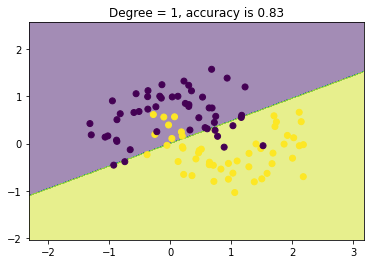

In [48]:
plot_decision_boundary(X,y)

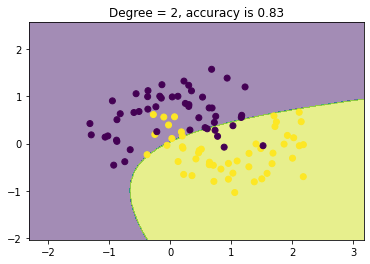

In [49]:
plot_decision_boundary(X,y,degree=2)

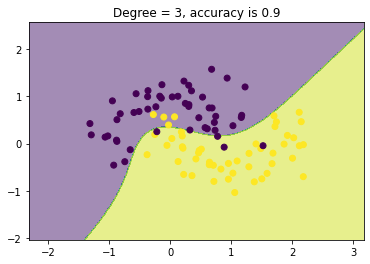

In [50]:
plot_decision_boundary(X,y,degree=3)

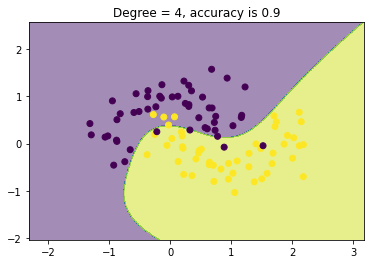

In [51]:
plot_decision_boundary(X,y,degree=4)

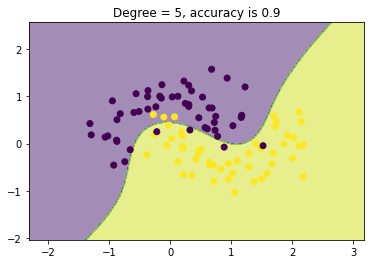

In [52]:
plot_decision_boundary(X,y,degree=5)

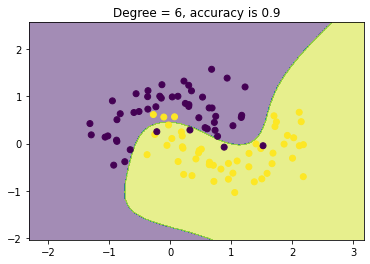

In [53]:
plot_decision_boundary(X,y,degree=6)

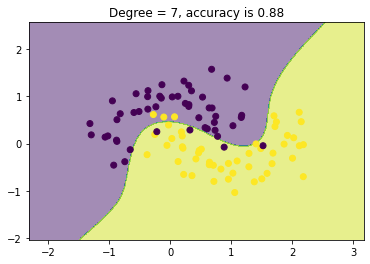

In [54]:
plot_decision_boundary(X,y,degree=7)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

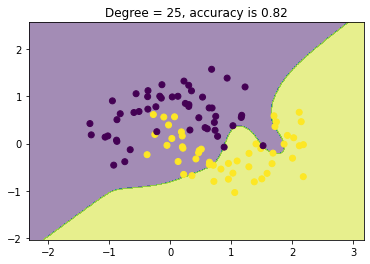

In [56]:
plot_decision_boundary(X,y,degree=25)